In [163]:
from __future__ import print_function
import osmnx as ox
import geopandas as gpd
from fiona.crs import from_epsg
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [215]:
#input data: zipcode shape file  ZIP_CODE_040114.shp
#also NYC borough shapefile for playing around but that is not necessary nyu_2451_34510/nyu_2451_34510.shp

In [83]:
boroughs = gpd.GeoDataFrame.from_file("nyu_2451_34510/nyu_2451_34510.shp")

In [99]:
boroughs.crs = from_epsg(2263) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
boroughs=boroughs.to_crs(epsg=4326)
boroughs

,aland,awater,cbsafp,classfp,countyfp,countyns,csafp,funcstat,geoid,geometry,intptlat,intptlon,lsad,metdivfp,mtfcc,name,namelsad,statefp
0,109028913,39838232,35620,H6,005,00974101,408,C,36005,POLYGON ((-73.93365199999998 40.88246299999983...,+40.8487111,-073.8529390,06,35644,G4020,Bronx,Bronx County,36
1,183398743,67615902,35620,H6,047,00974122,408,C,36047,POLYGON ((-74.05462199999998 40.65340599999983...,+40.6351332,-073.9507774,06,35644,G4020,Kings,Kings County,36
2,59144826,27854541,35620,H6,061,00974129,408,C,36061,(POLYGON ((-74.03444399999998 40.6868269999998...,+40.7765574,-073.9701736,06,35644,G4020,New York,New York County,36
3,281177201,180405065,35620,H6,081,00974139,408,C,36081,POLYGON ((-73.99708699999998 40.55728299999983...,+40.6585571,-073.8379293,06,35644,G4020,Queens,Queens County,36
4,151184452,113749023,35620,H6,085,00974141,408,C,36085,POLYGON ((-74.24927399999999 40.54492199999982...,+40.5638553,-074.1370633,06,35644,G4020,Richmond,Richmond County,36


In [52]:
zips = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
zips.COUNTY.unique

0        Queens
1         Kings
2         Kings
3         Kings
4         Kings
5         Kings
6         Kings
7         Kings
8         Kings
9         Kings
10        Bronx
11        Bronx
12        Bronx
13        Bronx
14        Bronx
15        Bronx
16        Bronx
17        Bronx
18        Bronx
19     New York
20        Bronx
21     New York
22     New York
23        Bronx
24     New York
25        Bronx
26        Bronx
27        Bronx
28        Bronx
29        Bronx
         ...   
233    New York
234    New York
235    New York
236    New York
237    New York
238    New York
239    New York
240    New York
241    New York
242    New York
243    New York
244    New York
245    New York
246    New York
247    New York
248    New York
249    New York
250    New York
251    New York
252    New York
253    New York
254      Queens
255      Queens
256    New York
257      Queens
258    Richmond
259       Kings
260       Kings
261    New York
262    New York
Name: COUNTY, dtype: obj

## visualize the street networks by borough

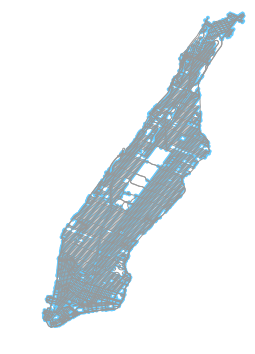

In [30]:
man = ox.graph_from_place('Manhattan, NY, USA', network_type='drive')
fig, ax = ox.plot_graph(man)
man

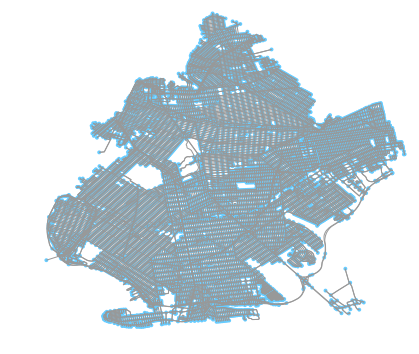

In [70]:
bk = ox.graph_from_place('Brooklyn, NY, USA', network_type='drive')
fig, ax = ox.plot_graph(bk)
bk


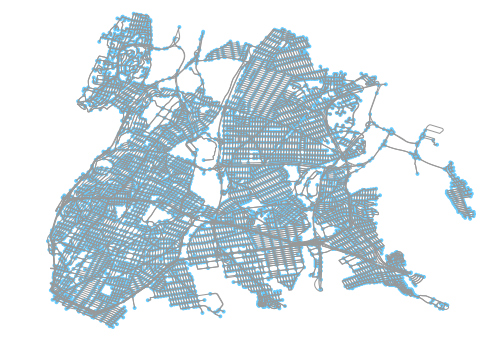

In [71]:
bx = ox.graph_from_place('Bronx, NY, USA', network_type='drive')
fig, ax = ox.plot_graph(bx)
bx


In [95]:
# staten island does not work with the from place query 
si = ox.graph_from_place('Staten Island, NY, USA', network_type='drive')
#si = ox.graph_from_polygon(boroughs.iloc[4].geometry, network_type='drive')
fig, ax = ox.plot_graph(si)
si

ValueError: Geometry must be a shapely Polygon or MultiPolygon

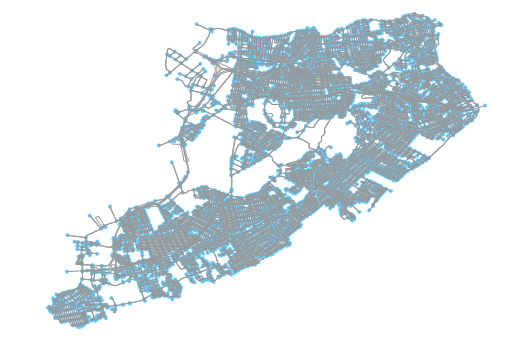

In [216]:
# use shape file to get staten island road network
si = ox.graph_from_polygon(boroughs.iloc[4].geometry, network_type='drive')
fig, ax = ox.plot_graph(si)
si

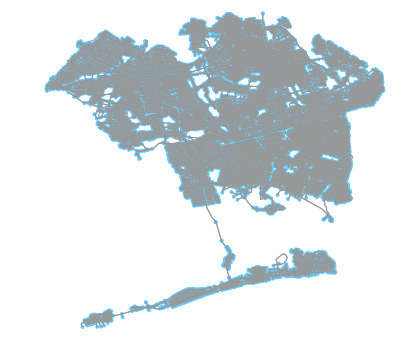

In [75]:
qn = ox.graph_from_place('Queens, NY, USA', network_type='drive')
fig, ax = ox.plot_graph(qn)
qn

In [ ]:
allrn = {"Queens":qn,
        "New York":mn,
        "Kings":bk,
        "Richmond":si,
        "Bronx":bx}

## extract roads by zipcode 

In [41]:
#first set coords to latlong to query OpenStreetMaps
zips.crs = from_epsg(2263) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
zipsll=zips.to_crs(epsg=4326)

In [217]:
#test with 10012 zipcode
twelve = zipsll[zips.ZIPCODE == '10012'].geometry.values[0]

In [45]:
twelve_roads = ox.graph_from_polygon(twelve, network_type='drive', simplify=True)

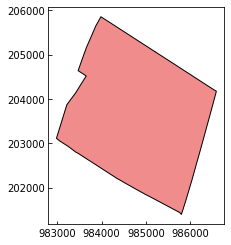

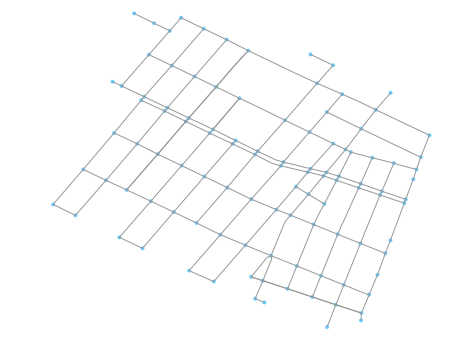

In [47]:
fig, ax = ox.plot_graph(twelve_roads)

In [62]:
ox.stats.basic_stats(twelve_roads)['street_length_total']

15734.93001448434

## host street length in a dictionary by zipcode 

In [109]:
# create a dictionary for the street length by zipcode
nzips = len(zipsll)
roadlength = {}


In [145]:
start = 219
for i,zipcode in enumerate(zipsll.index[start:]):
    #most of the zipcodes that fail are the tiny zipcodes in Manhattan
    print(zipsll.iloc[zipcode].ZIPCODE, i+1+start, "/", nzips)
    try:
        geom = zipsll.iloc[zipcode].geometry
        roads = ox.graph_from_polygon(geom, network_type='drive', simplify=True)
    except: 
        print ("bad")
        continue
    #print (ox.stats.basic_stats(roads))
    roadlength[zipsll.iloc[zipcode].ZIPCODE] = ox.stats.basic_stats(roads)['street_length_total']

10171 220 / 263
bad
10270 221 / 263
bad
10104 222 / 263
bad
10271 223 / 263
bad
10110 224 / 263
bad
10175 225 / 263
bad
10151 226 / 263
bad
10173 227 / 263
bad
10178 228 / 263
bad
10121 229 / 263
bad
10123 230 / 263
bad
10106 231 / 263
bad
10158 232 / 263
bad
10041 233 / 263
bad
10120 234 / 263
bad
10278 235 / 263
bad
10155 236 / 263
bad
10043 237 / 263
bad
10081 238 / 263
bad
10096 239 / 263
bad
10097 240 / 263
bad
10196 241 / 263
bad
10196 242 / 263
bad
10275 243 / 263
bad
10265 244 / 263
bad
10045 245 / 263
bad
10047 246 / 263
bad
10047 247 / 263
bad
10080 248 / 263
bad
10203 249 / 263
bad
10259 250 / 263
bad
10260 251 / 263
bad
10285 252 / 263
bad
10286 253 / 263
bad
10035 254 / 263
11371 255 / 263
11361 256 / 263
10036 257 / 263
11414 258 / 263
10310 259 / 263
11693 260 / 263
bad
11249 261 / 263
10162 262 / 263
bad
10119 263 / 263
bad


In [147]:
print (roadlength.keys())

[u'10065', u'10069', u'10453', u'10452', u'10451', u'10457', u'10456', u'10455', u'10454', u'10459', u'10458', u'11232', u'11233', u'11385', u'11234', u'11235', u'11222', u'11237', u'10282', u'10280', u'10281', u'11109', u'11379', u'11378', u'11102', u'11103', u'11377', u'11101', u'11106', u'11370', u'11104', u'11105', u'11375', u'11374', u'10048', u'11229', u'10040', u'11371', u'11228', u'10044', u'11201', u'11203', u'10128', u'11205', u'11204', u'11207', u'10027', u'11209', u'11208', u'11372', u'10024', u'11224', u'11368', u'11369', u'11366', u'11367', u'11364', u'11365', u'11362', u'11363', u'11360', u'10023', u'11221', u'11220', u'11040', u'11212', u'11213', u'11210', u'11211', u'10039', u'10038', u'11214', u'11215', u'10035', u'10034', u'10037', u'11219', u'10031', u'10030', u'10033', u'10032', u'11359', u'11358', u'11005', u'11004', u'11697', u'11694', u'11357', u'11356', u'11355', u'11354', u'11216', u'11217', u'10309', u'10308', u'10307', u'10306', u'10305', u'10304', u'10303',

In [152]:
for i,zipcode in enumerate(zipsll.index):
    if not zipsll.iloc[zipcode].ZIPCODE in roadlength.keys():
        roadlength[zipsll.iloc[zipcode].ZIPCODE] = 0

In [157]:
roadlengthDF = pd.DataFrame(roadlength.items(), columns=['ZIPCODE', 'streetlength'])

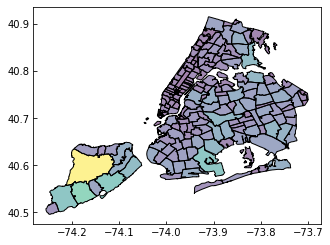

In [180]:
zipsl = zipsll.merge(roadlengthDF, on="ZIPCODE")
zipsl.plot(column='streetlength',cmap="viridis")

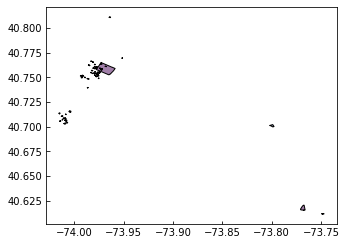

In [185]:
#empty zipcodes
zipsl.iloc[np.where(zipsl.streetlength == 0)].plot()

In [188]:
zipsl.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry,streetlength
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,POLYGON ((-73.80584847647394 40.68290932644246...,35548.690774
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,POLYGON ((-73.93739763139813 40.67972958925082...,39472.904387
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,POLYGON ((-73.90294132545438 40.67083977590006...,64408.363863
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,POLYGON ((-73.95797316043482 40.67065695897565...,30556.649614
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,POLYGON ((-73.97208109564257 40.65059658727609...,55369.251448


In [214]:
zipsl[["ZIPCODE","COUNTY","CTY_FIPS","POPULATION","PO_NAME","streetlength"]].set_index("ZIPCODE").to_csv("NYC_RoadLength_by_ZIP.csv")
#.reindex(index = zipsl.ZIPCODE, columns=["ZIPCODE","streetlength"])#[[, "streetlength"]]